# 2. Coding Up the Thin Disk Equations

Once we feel confident with using the terminal and opening Python files, we can start putting our equations into code. Create your own Jupyter Notebook and copy down this code cell by cell, making sure that each one of them runs as you go.

First we need to import some **packages**. Python is just a language---a lot of the *power* comes from libraries and packages that programmers have written to do specific actions or store values of commonly-used numbers (like pi, for example).

In [2]:
import numpy as np
from astropy.constants import G

There we go! If a package is successfully imported, it'll look like the cell didn't do anything. No output is produced. On the other hand, if we import a package that's misspelled or doesn't exist, we get something like this:

In [3]:
import hotgarbage

ModuleNotFoundError: No module named 'hotgarbage'

This is called an **error message**, and will pop up any time Python finds something wrong with your code or encounters some problem while running. Error messages can be incredibly helpful if you know how to read them! For instance, they will always include a "Traceback" which finds the origin of the issue and tells you the line in which it was found. This one is a *ModuleNoteFoundError*, and it very astutely tells us that the module we tried to import was bogus.

Moving on, let's define some *constants* that we'll be using in our equation. In code-speak, these are called **variables**, because we can set their values to be anything. However, we're just going to set the value of the variable once and then not touch it again.

In [4]:
M = 2 # Mass (arbitrary units)
Mdot = 10 # Mass accretion rate (arbitrary units)
r_in = 3 # Interior radius

Now that we have those constants defined, we have an equation to program. We want to put this equation into the code:

<img src="./figures/newtonian_flux_eqn.png" alt="Flux equation" width="400"/>

We have every variable defined except for `r`, so let's pick some arbitrary radius and see if we can get the equation to work!

In [5]:
r = 4 # Radius at which to evaluate the equation
print(3. * G.value * M * Mdot / (8. * np.pi * r**3) * (1. - np.sqrt(r_in / r)))

3.335489648433291e-13


There's a lot to pay attention to here. Note the following:

 - The numbers have a decimal even if they're round numbers. This is because, in Python, an integer can *only* ever be an integer, whereas a decimal (called a `float`) has enough precision to handle division, fractions, etc. Try this for example: calculate `2/3` with no decimal points, and then calculate `2./3.`. What's the difference?
 - The placement of parentheses is incredibly important! Math operations only apply to the quantity directly to the right of them. Therefore, if you want to write the fraction 3 over 8 pi, you can do `3 / (8 * np.pi)`, or `3 / 8 / np.pi`, but *NOT* `3 / 8 * pi`.
 - The equation has no units, because we haven't given it any! Later on we'll add units to all the constants we've defined and figure out what kind of quantity we're actually calculating here.
 
 Now to calculate the flux at a bunch of different radii we could just use this expression over and over again and change the value of `r` every time, but that would be tedious and exhausting. So, we make our lives easier with the use of a **function**. Much like the `print()` function we're familiar with, this function takes some *input* we give it and does something to it before returning an *output*. But, since we're the ones writing this function, we need to **define** what to do to the input before returning the output. The syntax is as follows:

In [6]:
# Define a function called F with argument r
def F(r):
    flux = 3. * G.value * M * Mdot / (8. * np.pi * r**3) * (1. - np.sqrt(r_in / r))    # Calculate the flux
    return flux      # Return the flux as an output

If we run that cell with `Shift + Enter` and we don't get an error message, we know that at least our syntax is correct. But, as you'll notice, no output is given! That's because we've just *set up* the function, but now we have to *run* it. This is called **calling a function** and is done like this:

In [7]:
print( F(4.) )

3.335489648433291e-13


It's that simple! We have our function, called `F()`, and whatever we put inside the parentheses is what it will use for the value of the radius. You'll notice that the number printed here is the same as the one we obtained a few lines above, because we gave it the same radius of 4 in arbitrary units. Let's try some other values:

In [8]:
print(F(1.))
print(F(2.))
print(F(3.))
print(F(4.))
print(F(5.))

-1.1664290800178942e-10
-4.476276627004574e-12
0.0
3.335489648433291e-13
2.8732104057396403e-13


We could keep going but this is already getting repetitive. Instead let's make an **array** of radii at which to evaluate the function. An **array** is just a collection of numbers that are packaged together. It can have any number of dimensions, meaning you could store a bunch of numbers as rows and columns, or even 3d or 4d etc. grids! The elements of an array are accessed with an **index** that tells you where in the array a particular number is found. Here's an example:

In [9]:
# Create an array
# Syntax is (start point, end point, spacing)
radii = np.arange(1, 50, 0.5)
print(radii)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5
 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5
 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5
 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5]


In [10]:
# Print the first element of the array
print(radii[0])

1.0


In [11]:
# Print the 15th element of the array. Note that counting in Python starts at 0!
print(radii[14])

8.0


In [12]:
# Print the last element of the array
print(radii[-1])

49.5


Here we're accessing specific **elements** of the array using their **index**. Index operations can become much more complicated and powerful, but we'll leave it at this for now. 

The other cool thing about arrays is that they can be used in math operations seamlessly! Instead of adding or multiplying a single number with another, Python automatically knows to use math operations on each element of the array instead. Check this out:

In [13]:
test_array = np.arange(1, 10) # If you don't set a spacing, it will default to 1.
print("Here's my array: ", test_array)
print("Here's my array times 2: ", test_array * 2)
print("Here's my array plus 5: ", test_array + 5)
print("Here's my array squared: ", test_array**2)

Here's my array:  [1 2 3 4 5 6 7 8 9]
Here's my array times 2:  [ 2  4  6  8 10 12 14 16 18]
Here's my array plus 5:  [ 6  7  8  9 10 11 12 13 14]
Here's my array squared:  [ 1  4  9 16 25 36 49 64 81]


Since the `F()` function we created earlier just uses simple math operations, we should be able to plug in an array of radii with no problem! Since the data type of the output matches the data type of the input in this case, we'll expect to get an array back out as well.

In [14]:
F(radii)

array([-1.16642908e-10, -1.95554427e-11, -4.47627663e-12, -9.73309123e-13,
        0.00000000e+00,  2.75676170e-13,  3.33548965e-13,  3.20866025e-13,
        2.87321041e-13,  2.50391420e-13,  2.16059158e-13,  1.86031428e-13,
        1.60427139e-13,  1.38817179e-13,  1.20631799e-13,  1.05315348e-13,
        9.23783461e-14,  8.14082669e-14,  7.20646102e-14,  6.40689970e-14,
        5.71946277e-14,  5.12567363e-14,  4.61045068e-14,  4.16144487e-14,
        3.76850579e-14,  3.42325502e-14,  3.11874620e-14,  2.84919447e-14,
        2.60976072e-14,  2.39637915e-14,  2.20561901e-14,  2.03457329e-14,
        1.88076885e-14,  1.74209338e-14,  1.61673604e-14,  1.50313876e-14,
        1.39995629e-14,  1.30602328e-14,  1.22032691e-14,  1.14198427e-14,
        1.07022334e-14,  1.00436721e-14,  9.43820661e-15,  8.88058955e-15,
        8.36618313e-15,  7.89087822e-15,  7.45102552e-15,  7.04337674e-15,
        6.66503416e-15,  6.31340737e-15,  5.98617593e-15,  5.68125714e-15,
        5.39677812e-15,  

Whoa! There we go. We've very quickly calculated the value of the flux at every radius we specified earlier. Now, I don't know about you, but I find it hard to read giant blocks of numbers. Let's visualise the result instead. I'll go through the details of plotting later on, but for now just copy this code as you see it here:

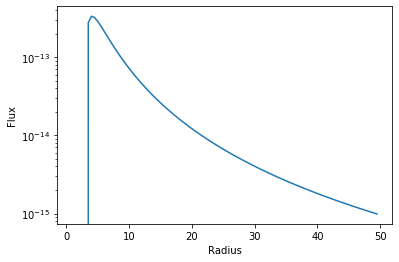

In [15]:
# Import plotting package and tell it to show the plots right here in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data!
plt.plot(radii, F(radii))
plt.xlabel("Radius") # Set the label on the x axis
plt.ylabel("Flux") # Set the label on the y axis
plt.yscale("log")# Use a log-scale on the y axis instead of linear
plt.show()

Very cool! This is an excellent start to understanding our equation and all its parameters.